In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample

In [2]:
# loading the file
file_to_load=os.path.join("Resources","AB_NYC_2019 2.csv")
file_to_save=pd.read_csv(file_to_load)

In [3]:
# add csv in the dataframe 
airbnb_df=pd.DataFrame(file_to_save)
# random sample
airbnb_df.tail(50)
# airbnb_df.dtypes

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48845,36454025,Private 5 star room,261338177,Diana,Brooklyn,Gravesend,40.59131,-73.97114,Private room,33,2,0,NaN,NaN,6,318
48846,36454717,#5 New Hotel-Like Private Room KING bed near JFK,263504959,David,Queens,Woodhaven,40.69185,-73.86431,Private room,37,1,0,NaN,NaN,8,352
48847,36455321,#6 New Hotel-Like Private Room QUEEN Bed near JFK,263504959,David,Queens,Woodhaven,40.69183,-73.86523,Private room,34,1,0,NaN,NaN,8,320
48848,36455402,Cute plant friendly studio in hip Brooklyn area!,184501278,Em,Brooklyn,Crown Heights,40.67198,-73.95329,Entire home/apt,180,1,0,NaN,NaN,1,165
48849,36455579,Studio in Manhattan(独立出入),257261595,Xiaolan,Manhattan,Harlem,40.80951,-73.95347,Entire home/apt,65,1,0,NaN,NaN,1,32
48850,36455584,Large studio at Union Square! for 3-5 ppl,50812891,Molo,Manhattan,East Village,40.73231,-73.98689,Entire home/apt,159,1,0,NaN,NaN,1,166
48851,36455649,#7 New Hotel-Like Private Room KING bed near JFK,263504959,David,Queens,Woodhaven,40.69137,-73.86591,Private room,35,1,0,NaN,NaN,8,341
48852,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1
48853,36455917,Sunny&quiet paradise in the WV with open views,274103383,Jennifer,Manhattan,West Village,40.73444,-74.00335,Private room,202,2,0,NaN,NaN,1,84
48854,36456548,Gorgeous Brooklyn Penthouse Apartment w/City V...,13108199,Jeffrey,Brooklyn,Greenpoint,40.72781,-73.94947,Private room,150,4,0,NaN,NaN,1,267


In [4]:
# check for null values
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
airbnb_df=airbnb_df.drop(columns=['last_review','reviews_per_month'])

In [6]:
airbnb_df['name'].replace(" ",np.nan,inplace=True)
airbnb_df=airbnb_df.dropna()

In [7]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
airbnb_host_df=airbnb_df['host_id'].value_counts(ascending=False)

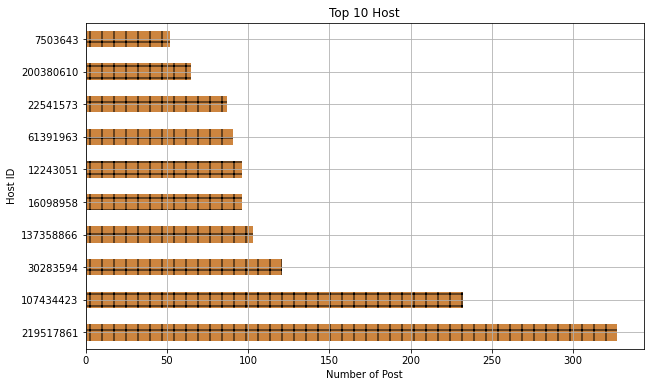

In [9]:
# top 10 host with most post
plt.subplots(figsize=(10,6))
airbnb_host_df.head(10).plot(kind="barh",color = "peru",hatch='+')
plt.xlabel("Number of Post")
plt.ylabel("Host ID")
plt.title("Top 10 Host")
plt.grid()
plt.show()

In [10]:
# room-type 
airbnb_room_value=airbnb_df['room_type'].value_counts()
airbnb_room_value

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

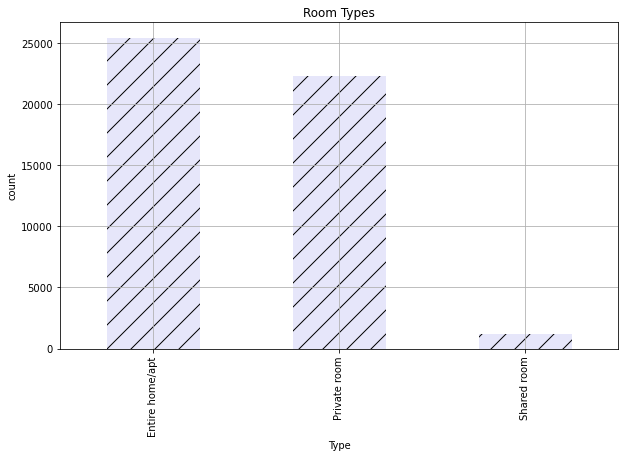

In [11]:
plt.subplots(figsize=(10,6))
airbnb_room_value.plot(kind = "bar", color = "lavender",hatch="/")
plt.xlabel("Type")
plt.ylabel("count")
plt.title("Room Types")
plt.grid()
plt.show()

In [12]:
# avg room type
airbnb_price_sum=airbnb_df.groupby('room_type').sum()['price']
airbnb_price_sum

room_type
Entire home/apt    5378415
Private room       2002953
Shared room          81218
Name: price, dtype: int64

In [13]:
# mean room type
# airbnb_df.groupby('room_type').mean()['price']
airbnb_avg_room=airbnb_price_sum/airbnb_room_value
airbnb_avg_room

room_type
Entire home/apt    211.806994
Private room        89.794360
Shared room         70.075928
dtype: float64

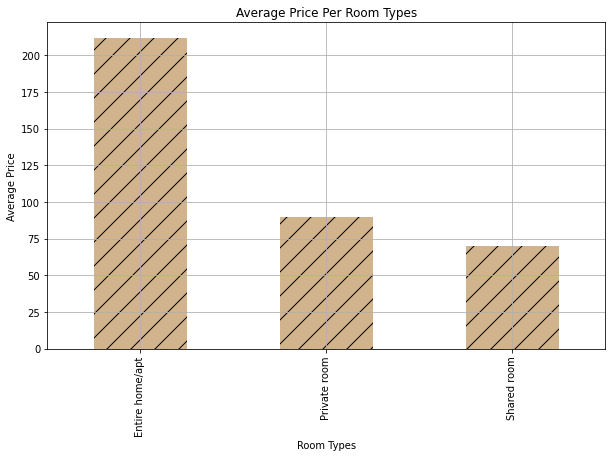

In [14]:
plt.subplots(figsize=(10,6))
airbnb_avg_room.plot(kind="bar",color = "tan",hatch='/')
plt.xlabel("Room Types")
plt.ylabel("Average Price")
plt.title("Average Price Per Room Types")
plt.grid()
plt.show()

In [15]:
airbnb_total_host=airbnb_df.groupby('host_id').sum()['price']
display(airbnb_df['host_id'].value_counts())

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
26676357       1
43311385       1
544621         1
21573063       1
68119814       1
Name: host_id, Length: 37425, dtype: int64

In [16]:
#top 10 neighborhood
neighbourhood=airbnb_df['neighbourhood'].value_counts().sort_values(ascending=False)
neighbourhood.head(10)

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
Hell's Kitchen        1954
East Village          1852
Upper East Side       1797
Crown Heights         1563
Midtown               1545
Name: neighbourhood, dtype: int64

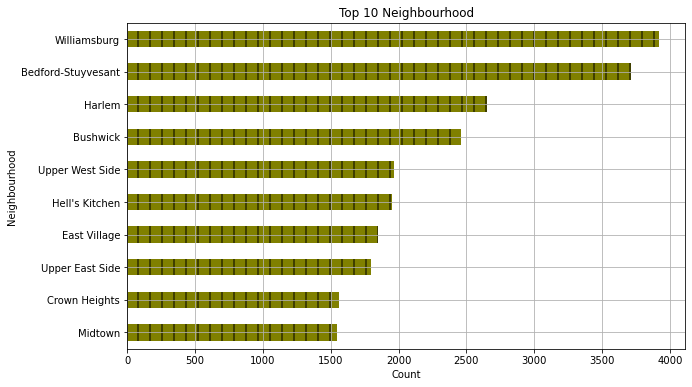

In [17]:
plt.subplots(figsize=(10,6))
neighbourhood.head(10).sort_values().plot(kind='barh',color='olive',hatch="|")
plt.xlabel("Count")
plt.ylabel("Neighbourhood")
plt.title("Top 10 Neighbourhood")
plt.grid()
plt.show()

In [18]:
# Data Preperation
airbnb_df.drop(["id", "name", "host_id", "host_name"], axis = 1, inplace = True)


In [19]:
airbnb_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [20]:
# Create features
X=airbnb_df.drop(['room_type'],axis=1)
X=pd.get_dummies(X)
X.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
0,40.64749,-73.97237,149,1,9,6,365,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,225,1,45,2,355,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,150,3,0,1,365,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,40.68514,-73.95976,89,1,270,1,194,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,80,10,9,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# create target
# airbnb_df["price"] = np.log1p(airbnb_df["price"])
y = airbnb_df[['room_type']]
y['room_type'].value_counts()


Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

In [22]:
X.describe()


,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,...,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,40.728941,-73.952170,152.740309,7.012444,23.273098,7.148369,112.801425,0.022289,0.411171,0.442978,...,0.000041,0.000225,0.000819,0.080171,0.000020,0.003213,0.001801,0.000225,0.000020,0.004810
std,0.054528,0.046159,240.232386,20.019757,44.549898,32.964600,131.610962,0.147624,0.492051,0.496743,...,0.006398,0.015003,0.028601,0.271561,0.004524,0.056596,0.042402,0.015003,0.004524,0.069187
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690090,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.763107,-73.936280,175.000000,5.000000,24.000000,2.000000,227.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Train Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
print(Counter(y_test['room_type']))


Counter({'Entire home/apt': 6376, 'Private room': 5559, 'Shared room': 280})


In [24]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(Counter(y_resampled['room_type']))

Counter({'Private room': 19017, 'Entire home/apt': 19017, 'Shared room': 19017})


In [27]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg', multi_class='multinomial')
model.fit(X_resampled,y_resampled)
y_pred= model.predict(X_test)

In [28]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
naive_accuracy=balanced_accuracy_score(y_test, y_pred)
print(naive_accuracy)

0.6376484653542408


In [41]:
# Calculated the accuracy 
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))
print('Error rate: {:.2f}'.format(1 - accuracy_score(y_test, y_pred)))

Accuracy: 0.76
Error rate: 0.24


In [30]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
naive_matrix = confusion_matrix(y_test, y_pred)
# naive_df = pd.DataFrame(
#     naive_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# naive_df
naive_matrix


array([[4435, 1355,  586],
       [ 715, 3154, 1690],
       [  25,   73,  182]])

In [31]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,
                                 sampling_strategy='auto').fit_resample(X_train, y_train)
print(Counter(y_resampled['room_type']))


Counter({'Private room': 19017, 'Entire home/apt': 19017, 'Shared room': 19017})


In [32]:
# Train the Logistic Regression model using the resampled data
model_smote=LogisticRegression(solver='newton-cg', multi_class='multinomial')
model_smote.fit(X_resampled,y_resampled)
y_pred=model_smote.predict(X_test)

In [33]:
# Calculated the balanced accuracy score
smote_accuracy=balanced_accuracy_score(y_test,y_pred)
smote_accuracy

0.6054721337155262

In [34]:
# Resample the training data with SMOTEENN
# Warning: This is a large dataset, and this step may take some time to complete
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print(Counter(y_resampled['room_type']))

Counter({'Shared room': 23191, 'Entire home/apt': 14206, 'Private room': 12727})


In [35]:
# Train the Logistic Regression model using the resampled data
model_smote_enn = LogisticRegression(solver='newton-cg', multi_class='multinomial')
model_smote_enn.fit(X_resampled,y_resampled)
y_pred=model_smote_enn.predict(X_test)

In [36]:
# Calculated the balanced accuracy score
smote_enn_accuracy=balanced_accuracy_score(y_test,y_pred)
smote_enn_accuracy

0.6239953773919177

In [37]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
smote_enn_imbalanced=classification_report_imbalanced(y_test,y_pred)
print(smote_enn_imbalanced)


                       pre       rec       spe        f1       geo       iba       sup

Entire home/apt       0.85      0.78      0.85      0.81      0.81      0.66      6376
   Private room       0.75      0.76      0.79      0.75      0.77      0.60      5559
    Shared room       0.13      0.34      0.95      0.18      0.56      0.30       280

    avg / total       0.79      0.76      0.82      0.77      0.79      0.62     12215

